# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: customer conversion from free-tier to paying customer

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last log in, activity score

#### 3. What timeframe is this data relevent for?

Answer: Jan - Apr 2015

#### 4. What is the hypothesis?

Answer: using data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in and activity score), we will be able to predict the likelihood that a customer will convert from a free-tier to a paying customer

## Let's get started with our UCLA admissions dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

/Users/kiefferthomas/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
np.random.seed(1984)

In [3]:
df = pd.read_csv("admissions.csv")

#### 1. Create a data dictionary 

Answer:

Variable | Description | Type of Variable
---| ---| ---
admit | 1 = admitted 0 = not admitted | binary
gre | GRE score | continuous
gpa | Grade point average | continuous
prestige | Prestige of undergrad (1 = highest prestige, 4 = Lowest) | categorical 

We would like to explore the association between the admit variable and the predictors gre, gpa, and prestige  

#### 2. What is the outcome?

Answer: admittance to program (admit variable)

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, and prestige

#### 4. What timeframe is this data relevent for?

Answer: NA - No information is given on the timeframe of this hypothetical data

#### 5. What is the hypothesis?

Answer: given data on an applicant's gre, gpa, and prestige of undergraduate program, a decent estimate of the probability of admittance to the graduate program can be obtained

#### 6.Using the above information, write a well-formed problem statement. 


Answer: Determine the likelihood of admittance to a graduate program using data on a candidate's GRE score, undergraduate GPA, and the prestige of their undergraduate institution, using the UCLA admissions dataset. The dataset is made up of hypothetical data (source data can be obtained [here](https://stats.idre.ucla.edu/stat/data/binary.csv); more information available at https://stats.idre.ucla.edu/r/dae/logit-regression/)

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

- Explore the overall nature of our data: size of dataset, column names and data types, and if there are any null values
- Check on frequencies (counts) for our binary and categorical variables
- Assess the distributions of our continuous variables
- Examine descriptive statistics of our continuous variables and remove any outliers

Overall, the goal of the exploratory analysis is to get a good overall picture of the data we are working with

#### 2a. What are the assumptions of the distribution of data? 

Answer: We are assuming the continuous variables in our dataset (gre and gpa) are approximately normal

#### 2b. How will determine the distribution of your data? 

Answer: The easiest way is to simply plot histograms of these variables

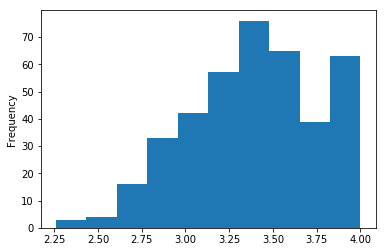

In [4]:
df['gpa'].plot.hist()

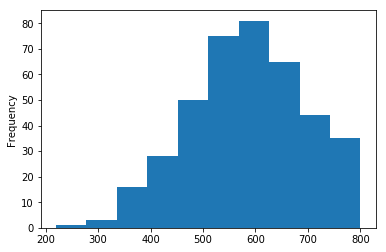

In [5]:
df['gre'].plot.hist()

Indeed, these two variables' distributions are relatively normal (though gpa is skewed slightly left and seems almost bimodal because of what looks like a large count of 4.0 gpas, it still roughly resembles the normal distribution, and we're going to treat this variable as if it were normal in our analysis).

#### 3a. How might outliers impact your analysis? 

Answer: While logistic regression is considered somewhat robust to influence from outliers, if there are outliers that are significantly influencing the model, we could expect errors in both our coefficient estimates and any inferences made from our analysis.

It is worth noting, before even checking for outliers, that both of our continuous variables are bounded (gpa will be between 0 and 4, gre maximum is at 800), so the risk of extreme outliers influencing our model appears relatively small.

#### 3b. How will you test for outliers? 

Answer: An outlier for the gre and gpa variables will be defined as an observation that is more than 2 standard deviations from the mean value of said variable.

#### 4a. What is collinearity? 

Answer: Collinearity occurs when there are high correlations between predictor variables. This can create numerous problems for our analysis, the chief one stated well on [Wikipedia](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity):

>In the presence of multicollinearity, the estimate of one variable's impact on the dependent variable Y while controlling for the others tends to be less precise than if predictors were uncorrelated with one another. The usual interpretation of a regression coefficient is that it provides an estimate of the effect of a one unit change in an independent variable, X_1, holding the other variables constant. If X_1 is highly correlated with another independent variable, X_2, in the given data set, then we have a set of observations for which X_1 and X_2 have a particular linear stochastic relationship. We don't have a set of observations for which all changes in X_1 are independent of changes in X_2, so we have an imprecise estimate of the effect of independent changes in X_1.

In the simplest terms, collinearity in our data would result in innacurate estimates of the effect each of our predictor variables have on the outcome variable because the predictor variables would not be independent of one another.

#### 4b. How will you test for colinearity? 

Answer: There are multiple ways to check for collinearity. A few useful things to do in this analysis to test/correct for collinearity would be:
1. Check if the standard errors of our predictor coefficients are large
2. Make sure all categorical variables included in our model have been correctly coded as dummy variables, and do not include all categories (avoiding the "dummy variable trap")
3. Cross-validate: take two independent subsets of our data, build the model on one subset, and confirm predictions are valid for the second subset
4. Try dropping variables from our model and see how that affects predictive power, as well as what effect that has on other predictor's coefficients and standard errors 

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

#### 1. Set *all* things we possibly can to be equal. This means:
 - Make the dataset used in this exploratory analysis readily available to person reproducing our work
 - Note all versions of tools we are using to run this analysis (Python version number as well as the version number of any libraries utilized)
 - Set the seed early and obviously in the code that is to be reproduced


#### 2. Follow these steps for the exploratory data analysis:
 1. Assess the overall structure of our data (column names, datatypes, number of observations)
 2. Check data for null values; remove any incomplete observations
 3. Return count and frequency data for our binary/categorical variables
 4. Create histograms for continuous variables to assess their distributions
 5. Check for any outliers in continuous variables (+/- 2 standard deviations from the mean); remove any outliers
 6. Create dummy variable for any predictors that are categorical (prestige in this case)
 7. Run logistic regression on our outcome variable (admit) using gre, gpa, and prestige as predictors


## Bonus Questions:
### 1. Outline your analysis method for predicting your outcome

Answer: Analysis method will be logistic regression with admit as the outcome variable and gre, gpa, and prestige as the covariates/predictors.

Let's just go ahead and build it (working with help from the [yhat tutorial](http://blog.yhat.com/posts/logistic-regression-and-python.html) on logistic regression)

In [6]:
# First some real quick descriptives and exploratory data analysis

# Size of our df
df.shape

(400, 4)

So 400 observations of 4 variables

In [7]:
# Let's see what those variables are

list(df.columns)

['admit', 'gre', 'gpa', 'prestige']

In [8]:
# And the data types
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [9]:
# Any null values in our dataset?

df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

A few, let's go ahead and get rid of any observations with null values

In [10]:
df.dropna(axis = 0, how = 'any', inplace = True)
df.shape

(397, 4)

In [11]:
# Let's see some frequency data of admittance rates by school prestige
pd.crosstab(df['admit'], df['prestige'], margins = True)

prestige,1.0,2.0,3.0,4.0,All
admit,,,,,
0,28,95,93,55,271
1,33,53,28,12,126
All,61,148,121,67,397


In [12]:
# Now let's check descriptives for our continuous variables
df[['gre', 'gpa']].describe().T

,count,mean,std,min,25%,50%,75%,max
gre,397.0,587.858942,115.717787,220.00,520.00,580.0,660.00,800.0
gpa,397.0,3.392242,0.380208,2.26,3.13,3.4,3.67,4.0


In [13]:
# And check for outliers (we'll use 2 standard deviations from the mean)
mean_gre, mean_gpa = df[['gre', 'gpa']].mean()
std_gre, std_gpa = df[['gre', 'gpa']].std()

print "Means (gre, gpa):", mean_gre, mean_gpa
print "Stds (gre, gpa):", std_gre, std_gpa

Means (gre, gpa): 587.858942065 3.3922418136
Stds (gre, gpa): 115.717787375 0.380208292149


In [14]:
gre_lo = mean_gre - (2 * std_gre)
gre_hi = mean_gre + (2 * std_gre)

gpa_lo = mean_gpa - (2 * std_gpa)
gpa_hi = mean_gpa + (2 * std_gpa)

print "GRE range:", gre_lo, "to", gre_hi
print "GPA range:", gpa_lo, "to", gpa_hi

GRE range: 356.423367315 to 819.294516816
GPA range: 2.6318252293 to 4.1526583979


In [15]:
# Looks like we've got a few outliers at the low ends. Let's drop them
df = df[(df['gre'] > 356.0) & (df['gpa'] > 2.63)]
df.shape

(379, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c17323790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c19a08990>]], dtype=object)

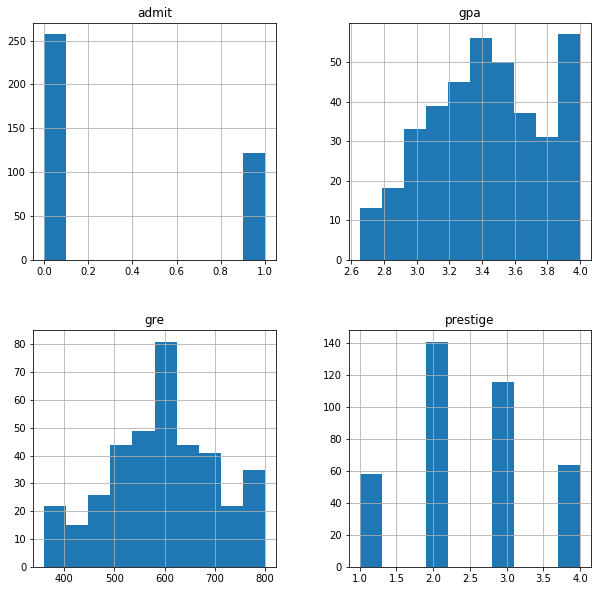

In [16]:
# Let's take a quick look at our data distros
df.hist(figsize = (10, 10))

In [17]:
# Now to build a logistic regression model. First create a dummy variable for prestige and join back into data
prestige_dummy = pd.get_dummies(df['prestige'], prefix='prestige')
prestige_dummy.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [18]:
# Join the columns we want from df and dummy (dropping original prestige as well as 'prestige_1' dummy)
df_full = df[['admit', 'gre', 'gpa']].join(prestige_dummy.loc[:, 'prestige_2':])
df_full.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


In [19]:
# And create an intercept for some reason (apparently a requirement of statsmodels is explicitly stated intercepts/constants)
df_full['intercept'] = 1.0
df_full.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


In [20]:
# Fit the model

train_cols = df_full.columns[1:] # This is all cols except admit

logit = sm.Logit(df_full['admit'], df_full[train_cols]) # Note to self: the syntax here

model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.578581
         Iterations 5


In [21]:
# Now let's get all the stats

print model.summary() # Produces nice table
print
print "Odds Ratios"
print np.exp(model.params) # Gives us our odds ratios

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  379
Model:                          Logit   Df Residuals:                      373
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.07912
Time:                        15:58:46   Log-Likelihood:                -219.28
converged:                       True   LL-Null:                       -238.12
                                        LLR p-value:                 4.371e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0024      0.001      2.085      0.037       0.000       0.005
gpa              0.8264      0.356      2.324      0.020       0.129       1.523
prestige_2.0    -0.7295      0.326     -2.24

Now, to interpret our odds ratios for our continuous variables:
 - Both gpa and gre have odds ratios > 1; this indicates that as those variables increase, so does the probability of admittance 
 - For gre, we can read this as: for each 1 point increase in one's GRE score, the odds of admittance increase by .24% (it is worth noting that since this holds for any one point difference, this relationship is exponential, rather than linear -- that is, to compare two scores that are 5 points apart, the odds of admittance for the higher score would not be low_score_odds + (5 x .0024 x low_score_odds), but rather low_score_odds x (1.0024 ^ 5)) 
 - For GPA: for a 1 point increase in gpa, the odds of admittance increase by about 128%
 
And for our categorical variable prestige, we see marked drops in odds of admittance for any rank that is not 1:
 - The odds of a canditate from a prestige "2" school getting admitted to the program are roughly halved (.48) from the odds of a prestige "1" candidate with the same gre scores and gpa
 - For prestige "3" and "4", the odds of admittance compared to a prestige "1" drop by about 3/4 (to .27 the odds of a prestige "1" admit) and 4/5 (.22) respectively

In [22]:
# For a little illustration of the impact that prestige has on probability of admittance, let's create
# some sample data for candidates with average candidate gre scores and gpas, but each with a different "prestige"
# rank for undergrad and see what our model predicts their probability of acceptance to be

mean_gpa, mean_gre = df_full[['gpa', 'gre']].mean()

candidates = [[mean_gre, mean_gpa, 1],     # Prestige rank "1" candidate
              [mean_gre, mean_gpa, 2],     # Prestige "2"
              [mean_gre, mean_gpa, 3],     # Prestige "3"
              [mean_gre, mean_gpa, 4]]     # Prestige "4"

can_df = pd.DataFrame(candidates)
can_df.columns = ["gre", "gpa", "prestige"]

can_df

,gre,gpa,prestige
0,596.147757,3.424987,1
1,596.147757,3.424987,2
2,596.147757,3.424987,3
3,596.147757,3.424987,4


In [23]:
# Get the data consistent to predict

# Note: prestige must be "dummified", or there's a conflict w/ dtypes when predicting (dummy creates uint8 dtype?)
dummy_ranks = pd.get_dummies(can_df['prestige'], prefix='prestige')
can_df = can_df[['gre', 'gpa']].join(dummy_ranks.loc[:, 'prestige_2':])

# Add intercept
can_df['intercept'] = 1.0

can_df

,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,596.147757,3.424987,0,0,0,1.0
1,596.147757,3.424987,1,0,0,1.0
2,596.147757,3.424987,0,1,0,1.0
3,596.147757,3.424987,0,0,1,1.0


In [24]:
# Predict admit probability for our 4 hypothetical candidates
can_df['admit_pred'] = model.predict(can_df.as_matrix())

ranks = ["Prestige '1' Candidate", "Prestige '2' Candidate", "Prestige '3' Candidate", "Prestige '4' Candidate"]
can_df.insert(loc = 0, column='candidate_prestige', value=ranks)

can_df

,candidate_prestige,gre,gpa,prestige_2,prestige_3,prestige_4,intercept,admit_pred
0,Prestige '1' Candidate,596.147757,3.424987,0,0,0,1.0,0.526955
1,Prestige '2' Candidate,596.147757,3.424987,1,0,0,1.0,0.349418
2,Prestige '3' Candidate,596.147757,3.424987,0,1,0,1.0,0.230148
3,Prestige '4' Candidate,596.147757,3.424987,0,0,1,1.0,0.195302


We can see from this how the probability of admittance (admit_pred) drops considerably as the prestige rank of a candidate's undergrad is lowered. These predictions also nicely illustrate the relationship between our predicted outcome (probability of admittance) and the odds ratio from our model summary.
 - The odds of admittance for a standard prestige 1 candidate are .53 / (1 - .53), or 1.13
 - The odds of admittance for a standard prestige 2 candidate are .35 / (1 - .35), or .54
 - This gives us the odds ratio (.54 / 1.13) of .48 when comparing a prestige 2 candidate with a prestige 1 candidate (and same procedure can be followed for a prestige 3 or prestige 4 candidate in comparison to prestige 1) 

### 2. Write an alternative problem statement for your dataset

Answer: Correctly categorize the prestige ranking of a candidate's undergraduate schooling from data on the individual's GRE score, GPA, and whether or not they were admitted to a graduate program, using the UCLA admissions dataset. The dataset is made up of hypothetical data (source data can be obtained [here](https://stats.idre.ucla.edu/stat/data/binary.csv); more information available at https://stats.idre.ucla.edu/r/dae/logit-regression/)

### 3. Articulate the assumptions and risks of the alternative model

Answer: The main assumption would be that continuous variables in our model are approximately normally distributed